# Load in dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Datasets.csv")

In [16]:
parameters = list(data.columns)
cell_data = data.filter(items=parameters[:-1])

In [37]:
cell_data.iloc[0]

Slant cell length        4.0
Cell thickness           2.0
Cell angle              70.0
Vertical cell length    25.0
Name: 0, dtype: float64

# Image generation

In [33]:
from math import sin, cos, radians

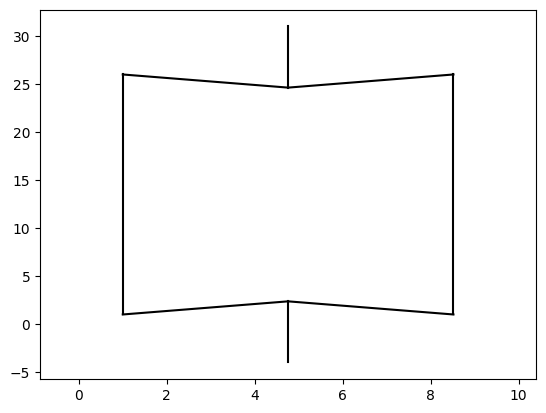

In [ ]:
def gen_image(data):
    # ignoring cell thickness for now
    slant_len = data["Slant cell length"]
    angle = data["Cell angle"]
    height = data["Vertical cell length"]
    # for calculating x and y coordinates of plot lines
    slant_dx = slant_len * cos(radians(90 - angle))
    slant_dy = slant_len * sin(radians(90 - angle))
    # plotting
    top = 1 + height
    bottom = 1
    center = 1 + slant_dx
    left = 1
    right = 1 + 2*slant_dx
    # [ [[x values of 1st slant], [y values of 1st slant]], [...], [...], [...] ]
    slants = [
        [[left, center], [bottom, bottom + slant_dy]],
        [[center, right], [bottom + slant_dy, bottom]],
        [[left, center], [top, top - slant_dy]],
        [[center, right],[top - slant_dy, top]]
    ]
    # plotting
    plt.xlim(left - 0.5*slant_dx, 0.5*slant_dx + right)
    for slant in slants:
        plt.plot(*slant, color='black')
    # vertical lines
    verticals = [
        [[left, left], [bottom, top]],
        [[center, center], [bottom + slant_dy, bottom - 0.2*height]],
        [[right, right], [bottom, top]],
        [[center, center], [top - slant_dy, top + 0.2*height]]
    ]
    for line in verticals:
        plt.plot(*line, color='black')

gen_image(cell_data.iloc[0])

2.39503